In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

data = pd.read_csv("./usa_preprocessed.csv")
# data = data.replace({'RACED': {400:"Chinese",410:"Chinese", 500:"Japanese", 600:"Filipino", 610:"Indian", 620:"Korean", 
#                                640:"Vietnamese",641:"Other",642:"Other",643:"Other",660:"Other",661:"Other",662:"Other",
#                                663:"Thai",664:"Other",665:"Other",666:"Indonesian",667:"Other",669:"Other",670:"Other",
#                                671:"Other",673:"Other",674:"Other",675:"Other",676:"Other",677:"Other",678:"Other",
#                                679:"Other"}})

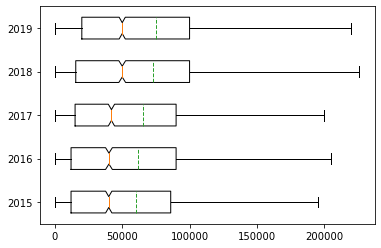

In [2]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]    
wage = [reported_wage[reported_wage['YEAR']==year]['INCWAGE'] for year in range(2015,2020)]  
_ = plt.boxplot(wage, labels=list(range(2015,2020)), vert = False, 
                showmeans = True, meanline = True, notch = True, showfliers = False)

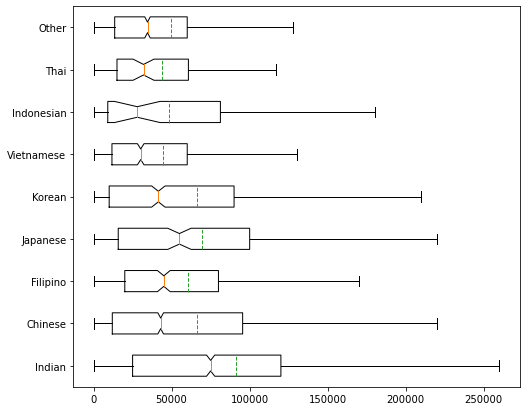

In [3]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]   
subgroup_list=['Indian', 'Chinese', 'Filipino', 'Japanese', 'Korean', 'Vietnamese', 'Indonesian', 'Thai', 'Other']
wage = [reported_wage[reported_wage['RACED']==race]['INCWAGE'] for race in subgroup_list]  
figure(figsize=(8, 7))
_ = plt.boxplot(wage, labels = subgroup_list, vert = False, showmeans = True, 
                meanline = True, notch = True, showfliers = False)

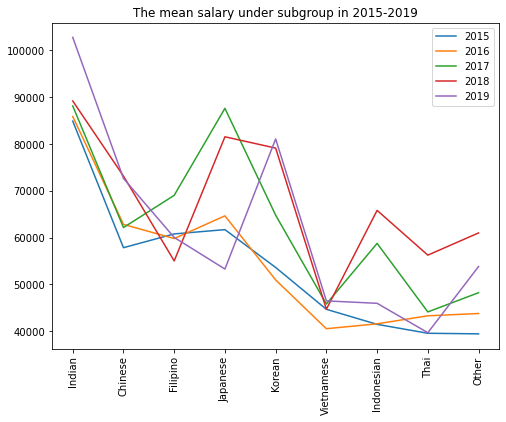

In [4]:
figure(figsize=(8, 6))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    subgroup_wage_mean = []
    for race in subgroup_list:
        reported_wage_subgroup = reported_wage_byyear[reported_wage_byyear['RACED']==race]
        subgroup_wage_mean.append(reported_wage_subgroup['INCWAGE'].mean())
        
    plt.plot(list(range(len(subgroup_list))), subgroup_wage_mean, label = year)
    plt.xticks(list(range(len(subgroup_list))), subgroup_list, rotation = 'vertical')
    plt.legend()
    plt.title('The mean salary under subgroup in 2015-2019')    

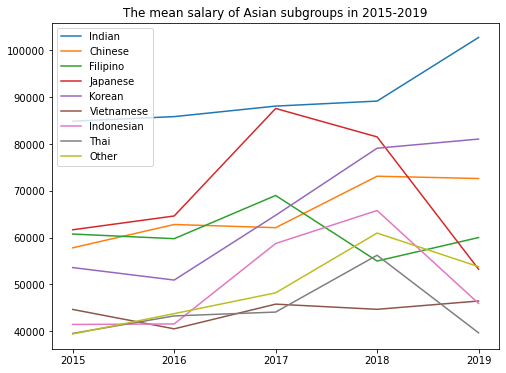

In [5]:
figure(figsize=(8, 6))
for race in subgroup_list:
    reported_wage_subgroup = reported_wage[reported_wage['RACED']==race]
    subgroup_wage_mean = []
    for year in range(2015,2020):
        reported_wage_byyear = reported_wage_subgroup[reported_wage_subgroup['YEAR']==year]
        subgroup_wage_mean.append(reported_wage_byyear['INCWAGE'].mean())
   
    plt.plot(list(range(2015, 2020)), subgroup_wage_mean, label = race)
    plt.xticks(np.arange(2015, 2020, 1))
    plt.legend()
    plt.title('The mean salary of Asian subgroups in 2015-2019')    

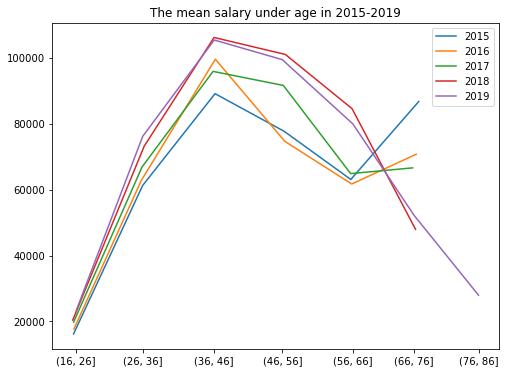

In [6]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]
reported_wage = reported_wage[['YEAR', 'AGE', 'INCWAGE']]
# reported_wage.groupby('AGE').count()

figure(figsize=(8, 6))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    reported_wage_byyear = reported_wage_byyear.sort_values(by=['AGE'])
    min_age = reported_wage_byyear['AGE'].min()
    max_age = reported_wage_byyear['AGE'].max()
    age_range = np.arange(min_age, max_age, 10)
    reported_wage_byyear_mean = reported_wage_byyear.groupby(pd.cut(reported_wage_byyear['AGE'], age_range)).mean()
    plt.plot(reported_wage_byyear_mean['AGE'], reported_wage_byyear_mean['INCWAGE'], label = year)
    plt.xticks(reported_wage_byyear_mean['AGE'], reported_wage_byyear_mean['AGE'].index.categories)
    plt.legend()
    plt.title('The mean salary under age in 2015-2019')

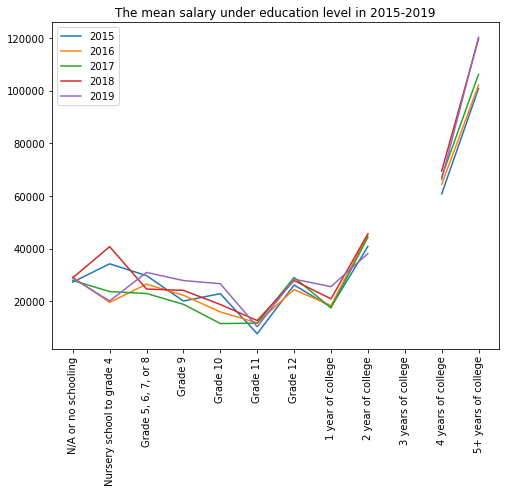

In [7]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]
reported_wage = reported_wage[['YEAR', 'EDUC', 'INCWAGE']]
EDUC_list = ["N/A or no schooling", "Nursery school to grade 4", "Grade 5, 6, 7, or 8", 
             "Grade 9", "Grade 10", "Grade 11", "Grade 12",
             "1 year of college",  "2 year of college",  "3 years of college",
             "4 years of college", "5+ years of college"]

figure(figsize=(8, 6))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    educ_wage_mean = []
    for code in range(reported_wage_byyear['EDUC'].max()+1):
        reported_wage_bycode = reported_wage_byyear[reported_wage_byyear['EDUC']==code]
        educ_wage_mean.append(reported_wage_bycode['INCWAGE'].mean())
        
    plt.plot(list(range(reported_wage_bycode['EDUC'].max()+1)), educ_wage_mean, label = year)
    plt.xticks(list(range(reported_wage_bycode['EDUC'].max()+1)), EDUC_list, rotation='vertical')
    plt.legend()
    plt.title('The mean salary under education level in 2015-2019')

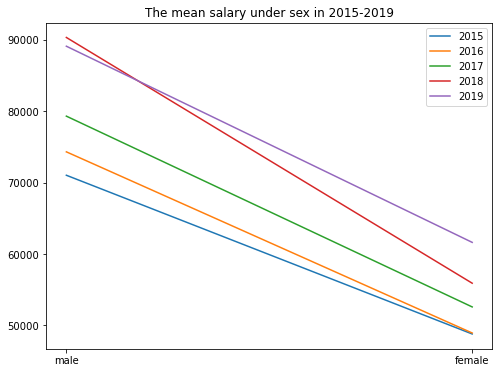

In [8]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]
reported_wage = reported_wage[['YEAR', 'SEX', 'INCWAGE']]
sex_list = ['male', 'female']

figure(figsize=(8, 6))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    sex_wage_mean = []
    for code in range(1, 3):
        reported_wage_bycode = reported_wage_byyear[reported_wage_byyear['SEX']==code]
        sex_wage_mean.append(reported_wage_bycode['INCWAGE'].mean())
        
    plt.plot(list(range(2)), sex_wage_mean, label = year)
    plt.xticks(list(range(2)), sex_list)
    plt.legend()
    plt.title('The mean salary under sex in 2015-2019')

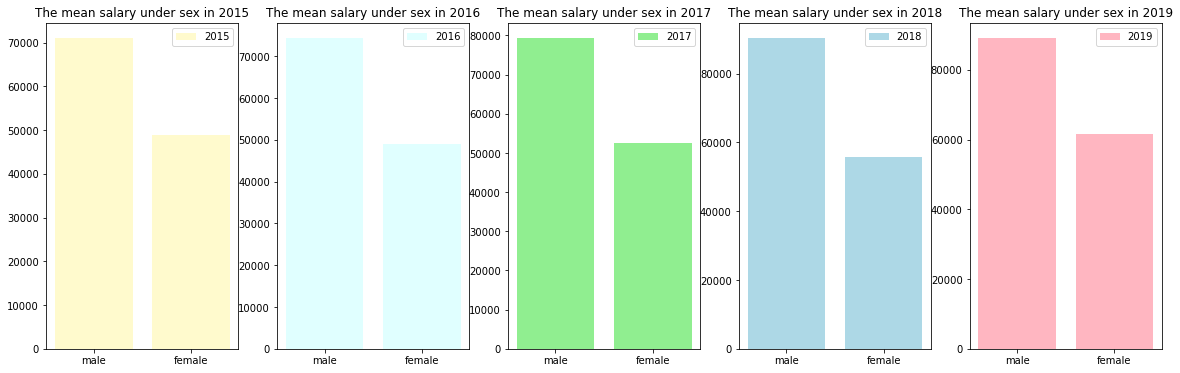

In [9]:
fig, axs = plt.subplots(1,5, figsize=(20, 6))
color_list=['lemonchiffon', 'lightcyan', 'lightgreen', 'lightblue', 'lightpink']
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    sex_wage_mean = []
    for code in range(1, 3):
        reported_wage_bycode = reported_wage_byyear[reported_wage_byyear['SEX']==code]
        sex_wage_mean.append(reported_wage_bycode['INCWAGE'].mean())
        
    axs[year-2015].set_xticks(list(range(2)))
    axs[year-2015].set_xticklabels(sex_list)
    axs[year-2015].bar(list(range(2)), sex_wage_mean, label = year, color = color_list[year-2015])
    axs[year-2015].legend()
    axs[year-2015].set_title('The mean salary under sex in %d' % year)

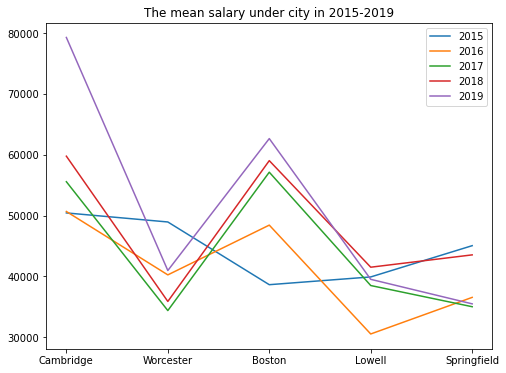

In [10]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]
city_data = reported_wage[reported_wage.CITY != 0]
city_data = city_data.replace({'CITY': {930:"Cambridge", 7570:"Worcester", 810:"Boston", 3770:"Lowell", 
                                        6670:"Springfield"}})
city_list = ["Cambridge", "Worcester", "Boston", "Lowell", "Springfield"]

figure(figsize=(8, 6))
for year in range(2015,2020):
    reported_wage_byyear = city_data[city_data['YEAR']==year]
    city_wage_mean = []
    for index in range(5):
        reported_wage_bycity = reported_wage_byyear[reported_wage_byyear['CITY']==city_list[index]]
        city_wage_mean.append(reported_wage_bycity['INCWAGE'].mean())
        
    plt.plot(list(range(5)), city_wage_mean, label = year)
    plt.xticks(list(range(5)), city_list)
    plt.legend()
    plt.title('The mean salary under city in 2015-2019')

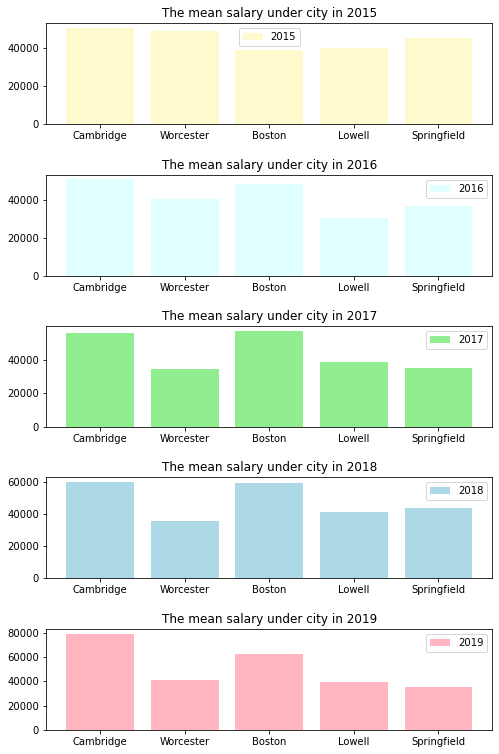

In [11]:
fig, axs = plt.subplots(5,1, figsize = (8,13)) #figsize = (8,13)
#fig.tight_layout()
color_list=['lemonchiffon', 'lightcyan', 'lightgreen', 'lightblue', 'lightpink']

for year in range(2015,2020):
    reported_wage_byyear = city_data[city_data['YEAR']==year]
    city_wage_mean = []
    for index in range(5):
        reported_wage_bycity = reported_wage_byyear[reported_wage_byyear['CITY']==city_list[index]]
        city_wage_mean.append(reported_wage_bycity['INCWAGE'].mean())
    
    plt.subplots_adjust(hspace = .5)
    axs[year-2015].set_xticks(list(range(5)))
    axs[year-2015].set_xticklabels(city_list)
    axs[year-2015].bar(list(range(5)), city_wage_mean, label = year, color = color_list[year-2015])
    axs[year-2015].legend()
    axs[year-2015].set_title('The mean salary under city in %d' % year)

In [12]:
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)&(data.OCC2010 != 9920)]
reported_wage = reported_wage[['YEAR', 'OCC2010', 'INCWAGE', 'AGE']]
occ=reported_wage['OCC2010'].value_counts()
occ = pd.DataFrame(occ)
occ.columns=['counts']
occ['code'] = occ.index
occ=occ[occ['counts']>100]

In [20]:
reported_wage = reported_wage[reported_wage['OCC2010'].isin(list(occ['code']))]
reported_wage = reported_wage.replace({'OCC2010': {1020: 'Software Developers, Applications and Systems Software',
                               2200: 'Postsecondary Teachers', 430: 'Other Business Operations Specialists(Managers)',
                               1000: 'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers',
                               3060: 'Physicians and Surgeons', 4720: 'Cashiers', 1760: 'Physical Scientists',
                               4000: 'Chefs and Cooks', 800: 'Accountants and Auditors', 1650: 'Medical Scientists, and Life Scientists', 
                               4760: 'Retail Salespersons', 3130: 'Registered Nurses', 1530: 'Engineers', 
                               4700: 'First-Line Supervisors of Sales Workers', 4110: 'Waiters and Waitresses', 
                               4520: 'Personal Appearance Workers', 2340: 'Other Teachers and Instructors',
                               7750: 'Assemblers and Fabricators',  710: 'Management Analysts', 
                               5240: 'Customer Service Representatives', 5860: 'Office Clerks', 120: 'Financial Managers', 
                               730:'Other Financial Specialists', 2310: 'Elementary and Middle School Teachers',
                               5700: 'Secretaries and Administrative Assistants',
                               1960:'Life, Physical, and Social Science Technicians', 110: 'Computer and Information Systems Managers', 
                               2540: 'Teacher Assistants', 4030: 'Food Preparation Workers', 1010:'Computer Programmers',
                               30: 'Managers in Marketing, Advertising, and Public Relations', 310: 'Food Service and Lodging Managers', 
                               3050: 'Pharmacists'}})

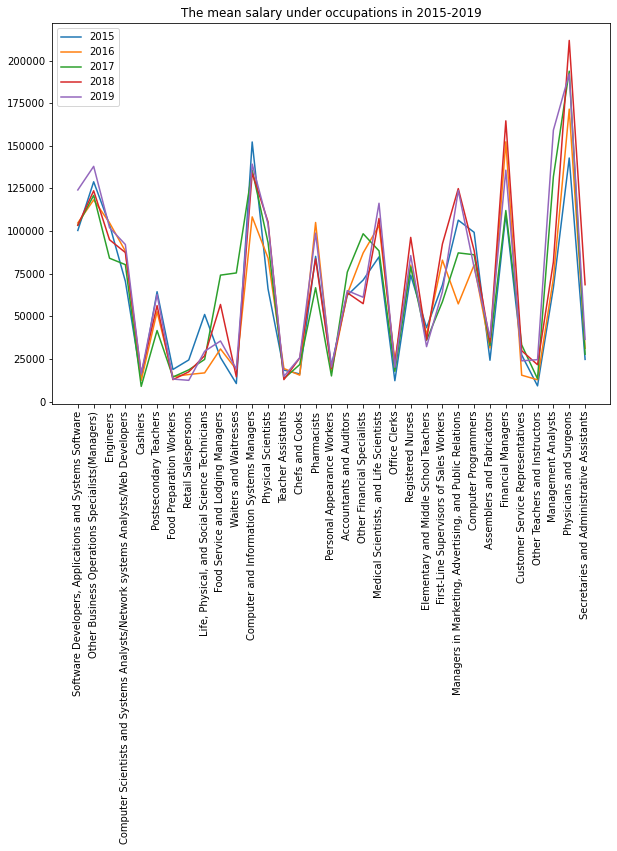

In [14]:
figure(figsize=(10, 7))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    occupation_wage_mean = []
    for occupation in list(set(reported_wage['OCC2010'])):
        reported_wage_occupation = reported_wage_byyear[reported_wage_byyear['OCC2010']==occupation]
        occupation_wage_mean.append(reported_wage_occupation['INCWAGE'].mean())
        
    plt.plot(list(range(len(occ))), occupation_wage_mean, label = year)
    plt.xticks(list(range(len(occ))), list(set(reported_wage['OCC2010'])), rotation = 'vertical')
    plt.legend()
    plt.title('The mean salary under occupations in 2015-2019')    

Text(0.5, 1.0, 'The mean age under occupation in 2015-2019')

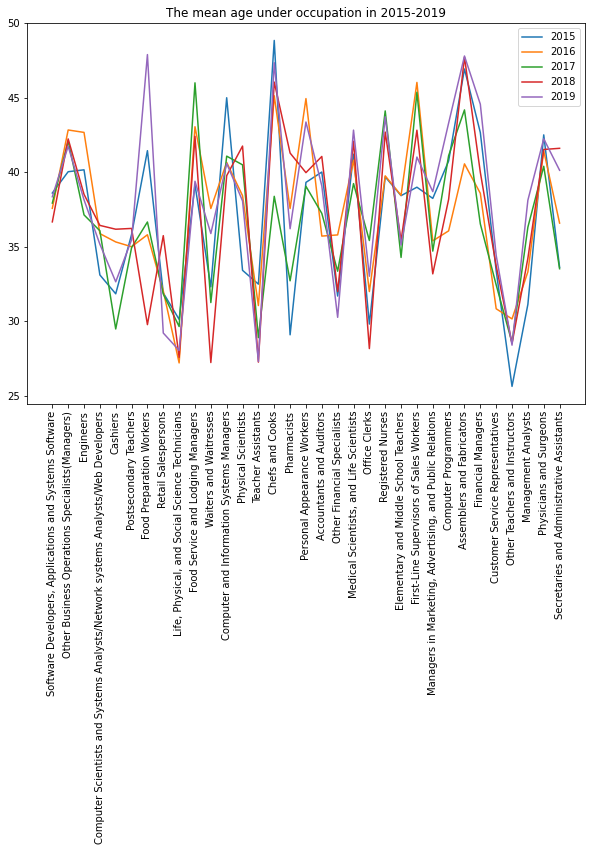

In [15]:
code_list = occ['code']
figure(figsize=(10, 7))
for year in range(2015,2020):
    reported_wage_byyear = reported_wage[reported_wage['YEAR']==year]
    mean_age = []
    for occupation in list(set(reported_wage['OCC2010'])): # top 10 occupation
        age_occ = reported_wage_byyear[reported_wage_byyear['OCC2010']==occupation]
        mean_age.append(age_occ['AGE'].mean())
    
    plt.plot(list(set(reported_wage['OCC2010'])), mean_age, label = year)
    plt.xticks(rotation = 'vertical')
    plt.legend()
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)&(data.OCC2010 != 9920)]
reported_wage = reported_wage[['YEAR', 'OCC2010', 'INCWAGE', 'AGE']]    
plt.title('The mean age under occupation in 2015-2019')

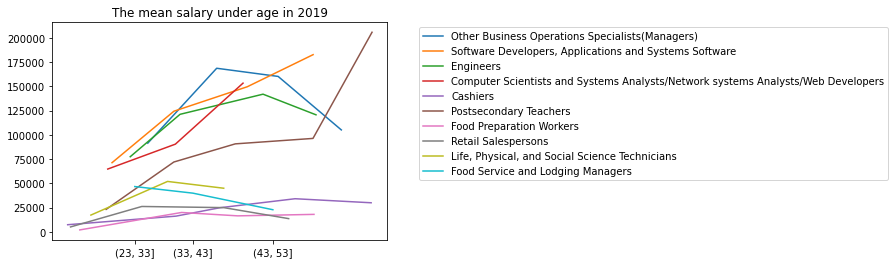

In [21]:
reported_wage = reported_wage[reported_wage['YEAR']==2019]

# fig, axs = plt.subplots(5,1)  #figsize = (8,13)
for occupation in list(set(reported_wage['OCC2010']))[:10]: 
    reported_wage_byocc = reported_wage[reported_wage['OCC2010']==occupation]
    min_age = reported_wage_byocc['AGE'].min()
    max_age = reported_wage_byocc['AGE'].max()
    age_range = np.arange(min_age, max_age, 10)
    reported_wage_byocc_mean = reported_wage_byocc.groupby(pd.cut(reported_wage_byocc['AGE'], age_range)).mean()
    plt.plot(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['INCWAGE'], label = occupation)
    plt.xticks(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['AGE'].index.categories)
    plt.legend(bbox_to_anchor=(1.08,1), loc="upper left")
    plt.title('The mean salary under age in 2019')

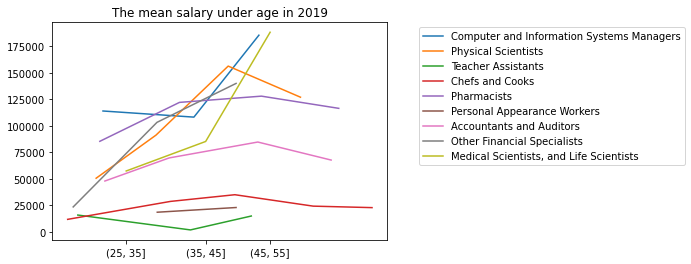

In [22]:
for occupation in list(set(reported_wage['OCC2010']))[11:20]: 
    reported_wage_byocc = reported_wage[reported_wage['OCC2010']==occupation]
    min_age = reported_wage_byocc['AGE'].min()
    max_age = reported_wage_byocc['AGE'].max()
    age_range = np.arange(min_age, max_age, 10)
    reported_wage_byocc_mean = reported_wage_byocc.groupby(pd.cut(reported_wage_byocc['AGE'], age_range)).mean()
    plt.plot(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['INCWAGE'], label = occupation)
    plt.xticks(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['AGE'].index.categories)
    plt.legend(bbox_to_anchor=(1.08,1), loc="upper left")
    plt.title('The mean salary under age in 2019')

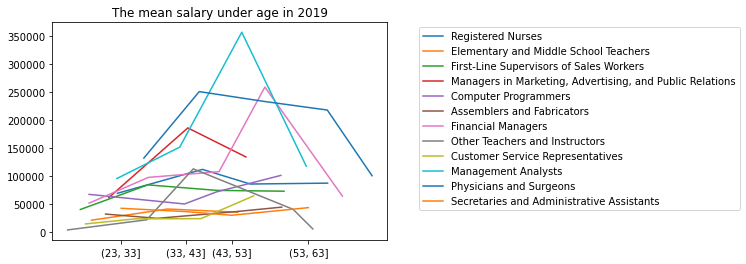

In [23]:
for occupation in list(set(reported_wage['OCC2010']))[21:34]: 
    reported_wage_byocc = reported_wage[reported_wage['OCC2010']==occupation]
    min_age = reported_wage_byocc['AGE'].min()
    max_age = reported_wage_byocc['AGE'].max()
    age_range = np.arange(min_age, max_age, 10)
    reported_wage_byocc_mean = reported_wage_byocc.groupby(pd.cut(reported_wage_byocc['AGE'], age_range)).mean()
    plt.plot(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['INCWAGE'], label = occupation)
    plt.xticks(reported_wage_byocc_mean['AGE'], reported_wage_byocc_mean['AGE'].index.categories)
    plt.legend(bbox_to_anchor=(1.08,1), loc="upper left")
    plt.title('The mean salary under age in 2019')